In [34]:
import pandas as pd
df = pd.read_csv("cleaned_sales_data_v5.csv")


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346581 entries, 0 to 346580
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   region         346581 non-null  object 
 1   price          346581 non-null  int64  
 2   year           346581 non-null  float64
 3   manufacturer   346581 non-null  object 
 4   model          346581 non-null  object 
 5   condition      346581 non-null  object 
 6   cylinders      346581 non-null  object 
 7   fuel           346581 non-null  object 
 8   odometer       346581 non-null  float64
 9   title_status   346581 non-null  object 
 10  transmission   346581 non-null  object 
 11  drive          346581 non-null  object 
 12  size           346581 non-null  object 
 13  type           346581 non-null  object 
 14  paint_color    346581 non-null  object 
 15  state          346581 non-null  object 
 16  lat            346581 non-null  float64
 17  long           346581 non-nul

In [3]:
df['cluster'].value_counts()

cluster
6     144230
0     124382
9      77426
10       414
5         97
11        26
4          3
1          2
12         1
Name: count, dtype: int64

In [4]:
df.isnull().count()

region           346581
price            346581
year             346581
manufacturer     346581
model            346581
condition        346581
cylinders        346581
fuel             346581
odometer         346581
title_status     346581
transmission     346581
drive            346581
size             346581
type             346581
paint_color      346581
state            346581
lat              346581
long             346581
posting_date     346581
matched_make     346581
matched_model    346581
cluster          346581
dtype: int64

In [5]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,size,type,paint_color,state,lat,long,posting_date,matched_make,matched_model,cluster
0,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,...,full-size,pickup,red,al,32.5900,-85.480000,2021-05-04T10:41:31-0500,toyota,tundra 4wd,0
1,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,...,full-size,truck,black,al,32.5920,-85.518900,2021-05-03T14:02:03-0500,ford,f-150 lightning platinum 4wd,6
2,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,...,full-size,pickup,black,al,32.5900,-85.480000,2021-05-03T13:41:25-0500,gmc,sierra k15 awd,6
3,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,...,compact,truck,grey,al,32.6013,-85.443974,2021-05-03T12:12:59-0500,toyota,tacoma 4wd,0
4,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,...,mid-size,pickup,red,al,32.5900,-85.480000,2021-05-03T11:31:14-0500,chevrolet,colorado 4wd,0


### จัดการ outlier

In [35]:
df=df[(df['price']<200000)&(df['odometer']<1000000)]

## แบ่งข้อมูลตัวเลข

In [36]:
df_num = df.select_dtypes('number')
df_num = df_num.drop(columns='cluster')
df_num

,price,year,odometer,lat,long
0,30990,2017.0,41124.0,32.590000,-85.480000
1,15000,2013.0,128000.0,32.592000,-85.518900
2,27990,2012.0,68696.0,32.590000,-85.480000
3,35000,2019.0,43000.0,32.601300,-85.443974
4,29990,2016.0,17302.0,32.590000,-85.480000
...,...,...,...,...,...
346576,23590,2019.0,32226.0,33.786500,-84.445400
346577,30590,2020.0,12029.0,33.786500,-84.445400
346578,34990,2020.0,4174.0,33.779214,-84.411811
346579,28990,2018.0,30112.0,33.786500,-84.445400


In [37]:
df_num['price'].describe()


count    346194.000000
mean      16201.264915
std       14331.670473
min           0.000000
25%        5500.000000
50%       12577.000000
75%       23999.000000
max      195000.000000
Name: price, dtype: float64

In [38]:
df_num['lat'].describe()

count    346194.000000
mean         38.596926
std           5.817627
min         -81.838232
25%          34.953500
50%          39.145315
75%          42.449125
max          82.252826
Name: lat, dtype: float64

In [39]:
x=df_num['odometer'].sort_values(ascending=False)
x.head(80)

102178    999999.0
263555    999999.0
213478    999999.0
10552     999999.0
80675     999999.0
            ...   
301568    999999.0
302519    999999.0
302518    999999.0
302517    999999.0
301562    999999.0
Name: odometer, Length: 80, dtype: float64

### take log กันข้อมูลเบ้

In [40]:
import numpy as np
import matplotlib.pyplot as plt
df_num['price'] = np.log1p(df_num['price'])
df_num['odometer'] = np.log1p(df_num['odometer'])
df_num['lat'] = np.log1p(df_num['lat'])


c:\Users\thesi\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([2.7123e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.3620e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.2000e+01,
        0.0000e+00, 7.0000e+00, 0.0000e+00, 4.0000e+00, 1.0000e+01,
        1.1000e+01, 0.0000e+00, 5.0000e+00, 1.4000e+01, 2.0000e+01,
        7.0000e+00, 1.1000e+01, 1.8000e+01, 1.2000e+01, 9.0000e+00,
        6.0000e+00, 1.5000e+01, 6.0000e+00, 1.0000e+01, 7.0000e+00,
        4.0000e+00, 9.0000e+00, 1.4000e+01, 1.4000e+01, 1.8000e+01,
        4.1000e+01, 5.3000e+01, 9.7500e+02, 4.9000e+01, 1.4600e+02,
        1.3300e+02, 1.4900e+02, 2.4400e+02, 5.6800e+02, 3.5300e+02,
        5.1200e+02, 6.2000e+02, 4.9900e+02, 5.1900e+02, 6.4700e+02,
        4.1700e+02, 1.1730e+03, 4.4900e+02, 5.2100e+02, 4.9600e+02,
        4.6200e+02, 1.2560e+03, 1.4300e+02, 7.4500e+02, 2.6600e+02,
        1.5930e+03, 1.2440e+03, 1.9800e+03, 1.3020e+03, 3.3340e+03,
        4.7380e+03, 5.2140e+03, 3.7790e+03, 6.4770e+03, 1.2212e+04,
        5.9200e+03, 1.0662e+04, 1.4335e+04, 1.40

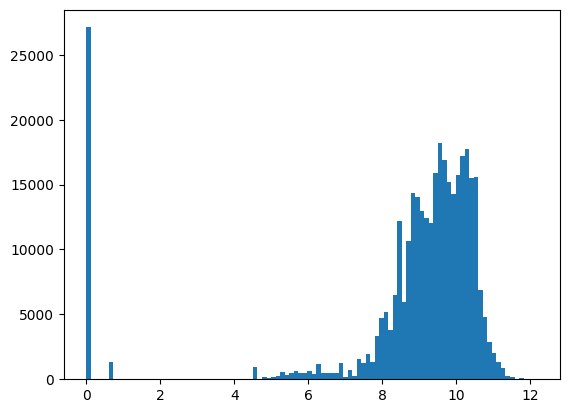

In [41]:
plt.hist(df_num['price'],bins=100)

(array([9.7300e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.4190e+03, 0.0000e+00, 1.3500e+02, 0.0000e+00, 0.0000e+00,
        5.1000e+01, 1.3400e+02, 1.7300e+02, 0.0000e+00, 2.9000e+01,
        7.8000e+01, 3.0000e+01, 3.3100e+02, 4.6000e+01, 5.1000e+01,
        8.5000e+01, 1.7000e+01, 4.6000e+01, 3.2000e+01, 5.1000e+01,
        2.2000e+01, 4.4000e+01, 1.0000e+01, 5.0000e+01, 2.0000e+01,
        5.3000e+01, 9.5000e+01, 7.8000e+01, 3.5500e+02, 2.0100e+02,
        1.9200e+02, 2.3500e+02, 2.0500e+02, 1.6600e+02, 1.0300e+02,
        6.1000e+01, 1.0100e+02, 8.1000e+01, 7.2000e+01, 1.1200e+02,
        1.6000e+02, 9.5000e+01, 8.4000e+01, 4.9000e+01, 9.0000e+01,
        5.9300e+02, 3.6800e+02, 3.0300e+02, 2.8900e+02, 2.5200e+02,
        4.2900e+02, 3.9900e+02, 3.7800e+02, 4.6200e+02, 5.4100e+02,
        7.8400e+02, 9.6000e+02, 9.4600e+02, 1.1430e+03, 1.6400e+03,
        1.6770e+03, 2.3190e+03, 2.6790e+03, 2.9990e+03, 4.1940e+03,
        4.2880e+03, 5.7160e+03, 6.5280e+03, 7.63

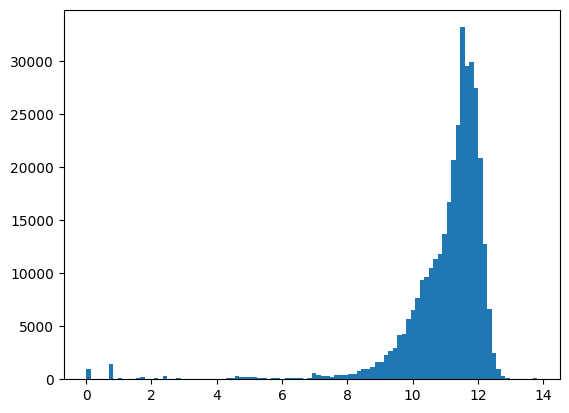

In [42]:
plt.hist(df_num['odometer'],bins=100)

(array([1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        2.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00,
        2.4400e+02, 1.9900e+02, 2.0790e+03, 8.0000e+01, 2.0000e+00,
        1.0000e+01, 2.3900e+02, 5.4320e+03, 6.17

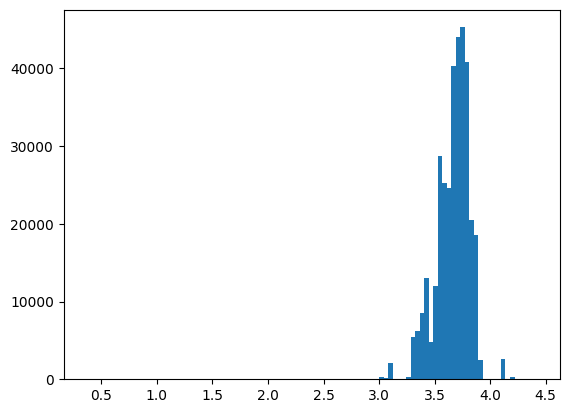

In [43]:
plt.hist(df_num['lat'],bins=100)

### แบ่งข้อมูลอักษร

In [44]:
df_ob = df.select_dtypes('object')
df_ob

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state,posting_date,matched_make,matched_model
0,auburn,toyota,tundra double cab sr,good,8 cylinders,gas,clean,Automatic (S6),4wd,full-size,pickup,red,al,2021-05-04T10:41:31-0500,toyota,tundra 4wd
1,auburn,ford,f-150 xlt,excellent,6 cylinders,gas,clean,automatic,rwd,full-size,truck,black,al,2021-05-03T14:02:03-0500,ford,f-150 lightning platinum 4wd
2,auburn,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,clean,Automatic 6-spd,4wd,full-size,pickup,black,al,2021-05-03T13:41:25-0500,gmc,sierra k15 awd
3,auburn,toyota,tacoma,excellent,6 cylinders,gas,clean,automatic,4wd,compact,truck,grey,al,2021-05-03T12:12:59-0500,toyota,tacoma 4wd
4,auburn,chevrolet,colorado extended cab,good,6 cylinders,gas,clean,Automatic 6-spd,4wd,mid-size,pickup,red,al,2021-05-03T11:31:14-0500,chevrolet,colorado 4wd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346576,wyoming,nissan,maxima s sedan 4d,good,6 cylinders,gas,clean,Automatic 6-spd,fwd,full-size,sedan,white,wy,2021-04-04T03:21:31-0600,nissan,maxima
346577,wyoming,volvo,s60 t5 momentum sedan 4d,good,4 cylinders,gas,clean,Automatic (variable gear ratios),fwd,mid-size,sedan,red,wy,2021-04-04T03:21:29-0600,volvo,s60
346578,wyoming,cadillac,xt4 sport suv 4d,good,4 cylinders,diesel,clean,Automatic (S5),fwd,mid-size,hatchback,white,wy,2021-04-04T03:21:17-0600,cadillac,xt4 fwd
346579,wyoming,lexus,es 350 sedan 4d,good,6 cylinders,gas,clean,Automatic (S9),fwd,mid-size,sedan,silver,wy,2021-04-04T03:21:11-0600,lexus,es 350


In [45]:
df_ob = df_ob.drop(columns={'posting_date','matched_make','matched_model'})

In [46]:
df_ob

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state
0,auburn,toyota,tundra double cab sr,good,8 cylinders,gas,clean,Automatic (S6),4wd,full-size,pickup,red,al
1,auburn,ford,f-150 xlt,excellent,6 cylinders,gas,clean,automatic,rwd,full-size,truck,black,al
2,auburn,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,clean,Automatic 6-spd,4wd,full-size,pickup,black,al
3,auburn,toyota,tacoma,excellent,6 cylinders,gas,clean,automatic,4wd,compact,truck,grey,al
4,auburn,chevrolet,colorado extended cab,good,6 cylinders,gas,clean,Automatic 6-spd,4wd,mid-size,pickup,red,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...
346576,wyoming,nissan,maxima s sedan 4d,good,6 cylinders,gas,clean,Automatic 6-spd,fwd,full-size,sedan,white,wy
346577,wyoming,volvo,s60 t5 momentum sedan 4d,good,4 cylinders,gas,clean,Automatic (variable gear ratios),fwd,mid-size,sedan,red,wy
346578,wyoming,cadillac,xt4 sport suv 4d,good,4 cylinders,diesel,clean,Automatic (S5),fwd,mid-size,hatchback,white,wy
346579,wyoming,lexus,es 350 sedan 4d,good,6 cylinders,gas,clean,Automatic (S9),fwd,mid-size,sedan,silver,wy


In [47]:
df_ob['condition'].value_counts()

condition
excellent    182919
good         138136
like new      18558
fair           5122
new             998
salvage         461
Name: count, dtype: int64

In [48]:
df_ob['cylinders'].value_counts()

cylinders
4 cylinders     128575
6 cylinders     123529
8 cylinders      88451
5 cylinders       2317
10 cylinders      1243
3 cylinders        905
4.0                488
6.0                397
8.0                153
12 cylinders       118
5.0                  8
2.0                  5
3.0                  4
10.0                 1
Name: count, dtype: int64

In [49]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
le = LabelEncoder()
sc = StandardScaler()

In [50]:
for i in df_ob.columns:
    df_ob[i] = df_ob[i].astype(str)  # Convert to string to handle NaNs and mixed types
    df_ob[i] = le.fit_transform(df_ob[i])

In [51]:
df_ob

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state
0,16,36,17884,2,12,8,0,15,0,1,36,8,1
1,16,12,7534,0,10,8,0,32,2,1,38,0,1
2,16,13,15077,2,12,8,0,24,0,1,36,0,1
3,16,36,16578,0,10,8,0,32,0,0,38,5,1
4,16,7,4735,2,10,8,0,24,0,2,36,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
346576,397,28,11458,2,10,8,0,24,1,1,37,10,50
346577,397,38,14423,2,6,8,0,19,1,2,37,8,50
346578,397,6,19015,2,6,6,0,14,1,2,33,10,50
346579,397,21,6646,2,10,8,0,18,1,2,37,9,50


In [53]:
prep_df =pd.concat([df_num,df_ob],axis=1)

In [54]:
prep_df

,price,year,odometer,lat,long,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state
0,10.341452,2017.0,10.624371,3.514228,-85.480000,16,36,17884,2,12,8,0,15,0,1,36,8,1
1,9.615872,2013.0,11.759793,3.514288,-85.518900,16,12,7534,0,10,8,0,32,2,1,38,0,1
2,10.239638,2012.0,11.137461,3.514228,-85.480000,16,13,15077,2,12,8,0,24,0,1,36,0,1
3,10.463132,2019.0,10.668979,3.514565,-85.443974,16,36,16578,0,10,8,0,32,0,0,38,5,1
4,10.308653,2016.0,9.758635,3.514228,-85.480000,16,7,4735,2,10,8,0,24,0,2,36,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346576,10.068621,2019.0,10.380560,3.549229,-84.445400,397,28,11458,2,10,8,0,24,1,1,37,10,50
346577,10.328461,2020.0,9.395159,3.549229,-84.445400,397,38,14423,2,6,8,0,19,1,2,37,8,50
346578,10.462846,2020.0,8.336870,3.549020,-84.411811,397,6,19015,2,6,6,0,14,1,2,33,10,50
346579,10.274741,2018.0,10.312712,3.549229,-84.445400,397,21,6646,2,10,8,0,18,1,2,37,9,50


### standard scaler

In [55]:
scaled_data = sc.fit_transform(prep_df)

In [56]:
scaled_df = pd.DataFrame(scaled_data, columns=prep_df.columns)

In [57]:
scaled_df

,price,year,odometer,lat,long,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state
0,0.623557,0.692559,-0.277497,-1.008005,0.514066,-1.520254,1.779443,1.482064,0.924581,1.203853,0.281514,-0.176791,-3.829872,-0.979795,-0.236845,0.612063,0.271746,-1.495836
1,0.360869,0.169729,0.493626,-1.007614,0.511953,-1.520254,-0.491139,-0.428535,-0.909593,0.412952,0.281514,-0.176791,0.269832,1.725531,-0.236845,0.765813,-1.734527,-1.495836
2,0.586697,0.039022,0.070968,-1.008005,0.514066,-1.520254,-0.396531,0.963895,0.924581,1.203853,0.281514,-0.176791,-1.659440,-0.979795,-0.236845,0.612063,-1.734527,-1.495836
3,0.667610,0.953974,-0.247202,-1.005796,0.516023,-1.520254,1.779443,1.240978,-0.909593,0.412952,0.281514,-0.176791,0.269832,-0.979795,-1.622329,0.765813,-0.480606,-1.495836
4,0.611682,0.561852,-0.865463,-1.008005,0.514066,-1.520254,-0.964176,-0.945228,0.924581,0.412952,0.281514,-0.176791,-1.659440,-0.979795,1.148639,0.612063,0.271746,-1.495836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346189,0.524781,0.953974,-0.443082,-0.778127,0.570274,1.724558,1.022583,0.295831,0.924581,0.412952,0.281514,-0.176791,-1.659440,0.372868,-0.236845,0.688938,0.773315,1.736748
346190,0.618854,1.084682,-1.112318,-0.778127,0.570274,1.724558,1.968659,0.843167,0.924581,-1.168849,0.281514,-0.176791,-2.865236,0.372868,1.148639,0.688938,0.271746,1.736748
346191,0.667507,1.084682,-1.831056,-0.779503,0.572099,1.724558,-1.058784,1.690846,0.924581,-1.168849,-2.018225,-0.176791,-4.071031,0.372868,1.148639,0.381437,0.773315,1.736748
346192,0.599405,0.823267,-0.489161,-0.778127,0.570274,1.724558,0.360330,-0.592459,0.924581,0.412952,0.281514,-0.176791,-3.106395,0.372868,1.148639,0.688938,0.522530,1.736748


In [58]:
scaled_df.shape

(346194, 18)

In [63]:
scaled_df.isnull().sum()

price           0
year            0
odometer        0
lat             0
long            0
region          0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [60]:
scaled_df = scaled_df.dropna()

In [62]:
scaled_df

,price,year,odometer,lat,long,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state
0,0.623557,0.692559,-0.277497,-1.008005,0.514066,-1.520254,1.779443,1.482064,0.924581,1.203853,0.281514,-0.176791,-3.829872,-0.979795,-0.236845,0.612063,0.271746,-1.495836
1,0.360869,0.169729,0.493626,-1.007614,0.511953,-1.520254,-0.491139,-0.428535,-0.909593,0.412952,0.281514,-0.176791,0.269832,1.725531,-0.236845,0.765813,-1.734527,-1.495836
2,0.586697,0.039022,0.070968,-1.008005,0.514066,-1.520254,-0.396531,0.963895,0.924581,1.203853,0.281514,-0.176791,-1.659440,-0.979795,-0.236845,0.612063,-1.734527,-1.495836
3,0.667610,0.953974,-0.247202,-1.005796,0.516023,-1.520254,1.779443,1.240978,-0.909593,0.412952,0.281514,-0.176791,0.269832,-0.979795,-1.622329,0.765813,-0.480606,-1.495836
4,0.611682,0.561852,-0.865463,-1.008005,0.514066,-1.520254,-0.964176,-0.945228,0.924581,0.412952,0.281514,-0.176791,-1.659440,-0.979795,1.148639,0.612063,0.271746,-1.495836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346189,0.524781,0.953974,-0.443082,-0.778127,0.570274,1.724558,1.022583,0.295831,0.924581,0.412952,0.281514,-0.176791,-1.659440,0.372868,-0.236845,0.688938,0.773315,1.736748
346190,0.618854,1.084682,-1.112318,-0.778127,0.570274,1.724558,1.968659,0.843167,0.924581,-1.168849,0.281514,-0.176791,-2.865236,0.372868,1.148639,0.688938,0.271746,1.736748
346191,0.667507,1.084682,-1.831056,-0.779503,0.572099,1.724558,-1.058784,1.690846,0.924581,-1.168849,-2.018225,-0.176791,-4.071031,0.372868,1.148639,0.381437,0.773315,1.736748
346192,0.599405,0.823267,-0.489161,-0.778127,0.570274,1.724558,0.360330,-0.592459,0.924581,0.412952,0.281514,-0.176791,-3.106395,0.372868,1.148639,0.688938,0.522530,1.736748


In [64]:
scaler_zero_mean = scaled_df - scaled_df.mean()
scaler_zero_mean

,price,year,odometer,lat,long,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state
0,0.623566,0.692532,-0.277489,-1.008005,0.514156,-1.520305,1.779461,1.482063,0.924566,1.203851,0.281537,-0.176726,-3.829849,-0.979768,-0.236869,0.612082,0.271770,-1.495891
1,0.360878,0.169702,0.493633,-1.007614,0.512043,-1.520305,-0.491121,-0.428536,-0.909608,0.412950,0.281537,-0.176726,0.269854,1.725559,-0.236869,0.765833,-1.734504,-1.495891
2,0.586705,0.038995,0.070976,-1.008005,0.514156,-1.520305,-0.396514,0.963894,0.924566,1.203851,0.281537,-0.176726,-1.659418,-0.979768,-0.236869,0.612082,-1.734504,-1.495891
3,0.667619,0.953947,-0.247194,-1.005796,0.516113,-1.520305,1.779461,1.240977,-0.909608,0.412950,0.281537,-0.176726,0.269854,-0.979768,-1.622353,0.765833,-0.480583,-1.495891
4,0.611691,0.561825,-0.865455,-1.008005,0.514156,-1.520305,-0.964159,-0.945228,0.924566,0.412950,0.281537,-0.176726,-1.659418,-0.979768,1.148615,0.612082,0.271770,-1.495891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346189,0.524790,0.953947,-0.443074,-0.778127,0.570364,1.724507,1.022600,0.295830,0.924566,0.412950,0.281537,-0.176726,-1.659418,0.372895,-0.236869,0.688957,0.773338,1.736693
346190,0.618863,1.084655,-1.112310,-0.778127,0.570364,1.724507,1.968676,0.843166,0.924566,-1.168850,0.281537,-0.176726,-2.865213,0.372895,1.148615,0.688957,0.271770,1.736693
346191,0.667515,1.084655,-1.831048,-0.779503,0.572189,1.724507,-1.058767,1.690845,0.924566,-1.168850,-2.018202,-0.176726,-4.071008,0.372895,1.148615,0.381456,0.773338,1.736693
346192,0.599414,0.823240,-0.489153,-0.778127,0.570364,1.724507,0.360347,-0.592460,0.924566,0.412950,0.281537,-0.176726,-3.106372,0.372895,1.148615,0.688957,0.522554,1.736693


In [65]:
from sklearn.decomposition import PCA
# ใช้ PCA
pca = PCA(n_components=0.80)
X_pca = pca.fit_transform(scaled_df)

# รับชื่อคอลัมน์
feature_names = scaled_df.columns

loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=feature_names
)

# แสดง loadings สำหรับ PC1 และ PC2
print("Feature Loadings for PC1 and PC2:")
print(loadings[['PC1', 'PC2']])

# ระบุ features ที่มีน้ำหนักมากที่สุดใน PC1 และ PC2
pc1_sorted = loadings['PC1'].abs().sort_values(ascending=False)
pc2_sorted = loadings['PC2'].abs().sort_values(ascending=False)

print("\nFeatures with Largest Weights in PC1:")
print(pc1_sorted.head())

print("\nFeatures with Largest Weights in PC2:")
print(pc2_sorted.head())

Feature Loadings for PC1 and PC2:
                   PC1       PC2
price         0.223552 -0.062137
year          0.395575 -0.124512
odometer     -0.451013 -0.076654
lat          -0.089305 -0.368371
long          0.059482 -0.059199
region       -0.029911  0.094978
manufacturer -0.015979  0.022990
model         0.043027 -0.375095
condition     0.461056  0.094206
cylinders    -0.058696 -0.204127
fuel         -0.320582  0.088634
title_status -0.027110  0.073424
transmission -0.497893 -0.020930
drive        -0.036715  0.578453
size         -0.041737 -0.102098
type         -0.002839  0.435971
paint_color  -0.071041  0.010476
state        -0.007068 -0.293040

Features with Largest Weights in PC1:
transmission    0.497893
condition       0.461056
odometer        0.451013
year            0.395575
fuel            0.320582
Name: PC1, dtype: float64

Features with Largest Weights in PC2:
drive    0.578453
type     0.435971
model    0.375095
lat      0.368371
state    0.293040
Name: PC2, dtype: fl

In [66]:
import numpy as np
cov_scaler = np.cov(scaler_zero_mean,rowvar=False)
cov_scaler

array([[ 1.00007934e+00,  4.34989524e-02, -4.53752287e-02,
         9.91247856e-03,  2.41591905e-02, -1.61210638e-02,
        -1.22937283e-02,  2.71855538e-02,  1.15289191e-01,
         7.97753209e-02, -5.91607059e-02,  1.75255848e-02,
        -1.43200433e-01, -2.72383801e-02, -1.11129965e-02,
        -9.19080071e-04, -4.92203733e-02, -1.83951027e-02],
       [ 4.34989524e-02,  1.00003589e+00, -2.23700039e-01,
        -1.76208067e-02, -2.58159033e-02, -3.29808224e-03,
         1.63036277e-02,  3.27338937e-02,  1.37958090e-01,
        -1.77067682e-01, -1.06181438e-01, -9.63437021e-03,
        -1.95904027e-01, -1.72586891e-01, -1.94605880e-03,
        -4.89933048e-02, -5.35102201e-03,  1.22245530e-02],
       [-4.53752287e-02, -2.23700039e-01,  9.99885076e-01,
         3.56603472e-02,  3.33123264e-02,  1.91166213e-02,
         1.24817679e-02, -6.69999169e-03, -3.13894029e-01,
         5.98455519e-02,  6.60068059e-02,  7.68485456e-03,
         2.03518596e-01, -3.66695290e-02,  1.37148000e

In [67]:
eigenvalue_scaler,eigenvector_scaler =np.linalg.eig(cov_scaler)
eigenvector_scaler

array([[-0.22355154, -0.06213725,  0.17525676, -0.05898805,  0.04443161,
         0.00090494,  0.23716491,  0.08182559, -0.01753383,  0.14566653,
         0.01804054,  0.51150342,  0.4403985 , -0.32425769, -0.18488506,
         0.4571685 ,  0.14228081, -0.0322634 ],
       [-0.39557472, -0.1245124 , -0.32030266,  0.00829391, -0.41438052,
        -0.20296852, -0.07510858, -0.11631237,  0.26782035,  0.42872019,
        -0.02940078,  0.30597772, -0.20159779,  0.03631002,  0.2973044 ,
        -0.09309142, -0.05874279,  0.02819907],
       [ 0.45101325, -0.0766535 ,  0.1327841 , -0.01170768, -0.09281745,
        -0.24674202, -0.11271848, -0.63922727, -0.15951041,  0.06426057,
         0.14554539,  0.06099759, -0.06668693, -0.33009948,  0.21200303,
         0.08608605,  0.18486633, -0.16645516],
       [ 0.08930452, -0.36837073, -0.02837567,  0.30823629, -0.32625782,
         0.3725486 , -0.16125537, -0.00689136, -0.31913029,  0.01856177,
        -0.49822406, -0.08239799,  0.09731736,  0.030

In [68]:
total_variance_scaler = np.sum(eigenvalue_scaler)
total =0
for i,v in enumerate(eigenvalue_scaler):
    print("PVES {} : {} %".format(i,v*100/total_variance_scaler))
    total+=v*100/total_variance_scaler
    print("cumulative PVES {} : {} %".format(i,total))

PVES 0 : 10.114961758480637 %
cumulative PVES 0 : 10.114961758480637 %
PVES 1 : 8.73590333644839 %
cumulative PVES 1 : 18.850865094929027 %
PVES 2 : 7.626824360501114 %
cumulative PVES 2 : 26.47768945543014 %
PVES 3 : 7.0801893906084565 %
cumulative PVES 3 : 33.5578788460386 %
PVES 4 : 2.888115930823996 %
cumulative PVES 4 : 36.44599477686259 %
PVES 5 : 3.47304309800712 %
cumulative PVES 5 : 39.91903787486971 %
PVES 6 : 3.6816841637921116 %
cumulative PVES 6 : 43.60072203866182 %
PVES 7 : 3.632461955187662 %
cumulative PVES 7 : 47.23318399384949 %
PVES 8 : 4.197194369774311 %
cumulative PVES 8 : 51.430378363623795 %
PVES 9 : 4.376025190905113 %
cumulative PVES 9 : 55.806403554528906 %
PVES 10 : 6.256230606483061 %
cumulative PVES 10 : 62.062634161011964 %
PVES 11 : 4.8987226463354405 %
cumulative PVES 11 : 66.9613568073474 %
PVES 12 : 5.886137460563119 %
cumulative PVES 12 : 72.84749426791052 %
PVES 13 : 5.790913596300678 %
cumulative PVES 13 : 78.6384078642112 %
PVES 14 : 5.2148534221

In [71]:
pca = PCA(n_components=14)
X_reduced = pca.fit_transform(scaled_df)

In [72]:
X_reduced

array([[ 2.95230332, -0.32323511, -0.02425345, ...,  0.53974431,
         0.08199039,  0.38639435],
       [-0.50479575,  1.87727582,  0.90539295, ..., -0.5657655 ,
        -1.02630663,  0.37946207],
       [ 1.60273602, -0.18839096,  1.07683876, ...,  0.2827885 ,
        -0.35021422,  0.8534802 ],
       ...,
       [ 4.58952344, -0.29471952,  0.90513794, ...,  0.65473674,
        -1.32241765, -2.15877014],
       [ 2.45108362,  0.52007428,  0.62308721, ...,  0.14949111,
        -0.06857916, -0.09209885],
       [ 2.71873453,  2.07685495,  0.85662369, ..., -1.8640004 ,
         0.55477081, -1.69262725]])

c:\Users\thesi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\thesi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\thesi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\thesi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

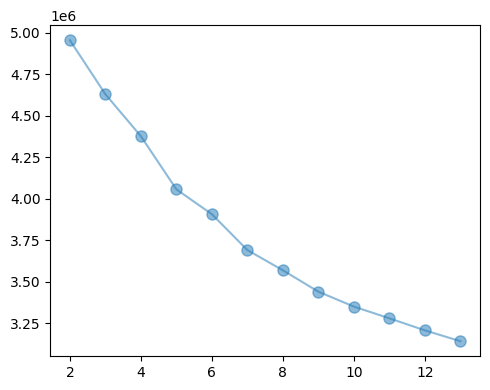

In [73]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
sse = {}
for k in range(2, 14):
    kmeans = KMeans(n_clusters=k).fit(X_reduced)
    sse[k] = kmeans.inertia_
_,ax=plt.subplots(figsize=(5,4))
ax.plot(list(sse.keys()), list(sse.values()), marker='o', alpha=0.5, ms=8);
plt.tight_layout();

In [ ]:
K = 15
# Fit the input data 
kmeans = KMeans(n_clusters=K).fit(X_reduced) 

c:\Users\thesi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Visualize the clustering 

In [ ]:
for k in range(7,9):
    for i in range(10,30):
        kmeans = KMeans(n_clusters=k,n_init=i).fit(scaled_df) 
        print(f'cluster {k} n_init {i}')
        # Get the cluster labels 
        labels = kmeans.predict(scaled_df) # or use kmeans.labels 
        # Get sum of squares distance of all points 
        sse = kmeans.inertia_ 
        # Centroid values 
        centroids = kmeans.cluster_centers_ 
        np.set_printoptions(precision=3) 
        print(f"Sum of squared errors : {sse:.3f}") 
        

cluster 7 n_init 10
Sum of squared errors : 4520497.625
cluster 7 n_init 11
Sum of squared errors : 4515718.762
cluster 7 n_init 12
Sum of squared errors : 4549639.286
cluster 7 n_init 13
Sum of squared errors : 4546397.328
cluster 7 n_init 14
Sum of squared errors : 4504262.767
cluster 7 n_init 15
Sum of squared errors : 4506587.604
cluster 7 n_init 16
Sum of squared errors : 4482158.051
cluster 7 n_init 17
Sum of squared errors : 4513747.906
cluster 7 n_init 18
Sum of squared errors : 4480061.396
cluster 7 n_init 19
Sum of squared errors : 4497009.923
cluster 7 n_init 20
Sum of squared errors : 4521881.315
cluster 7 n_init 21
Sum of squared errors : 4506586.454
cluster 7 n_init 22
Sum of squared errors : 4480061.762
cluster 7 n_init 23
Sum of squared errors : 4507901.062
cluster 7 n_init 24
Sum of squared errors : 4480058.778
cluster 7 n_init 25
Sum of squared errors : 4480061.805
cluster 7 n_init 26
Sum of squared errors : 4480059.894
cluster 7 n_init 27
Sum of squared errors : 4506

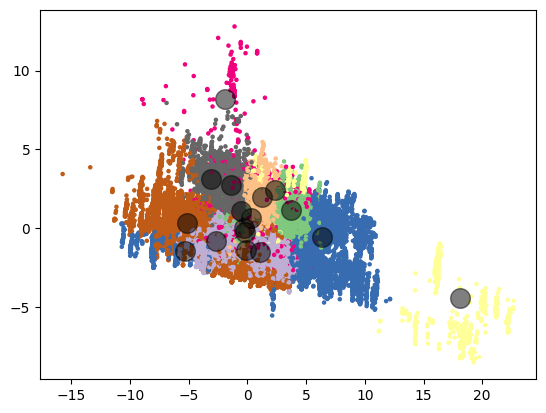

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming X_reduced is a NumPy array after PCA reduction
kmeans = KMeans(n_clusters=17,n_init=13).fit(X_reduced)  # Fit the model with 8 clusters
labels = kmeans.predict(X_reduced)  # Predict the cluster labels

# Scatter plot
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, s=5, cmap='Accent')

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()

In [ ]:
new_df =df_prep.copy()

In [ ]:
new_df

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,type,...,fuelcost08,yousavespend,fescore,ghgscore,barrels08,co2tailpipegpm,highway08,uhighway,comb08,ghgscorea
0,16,13,15819,2,6,2,0,3,2,9,...,2634.682769,-3662.635445,5.306565,5.277963,13.701777,408.724731,27.840575,39.698909,23.413773,4.361242
1,16,7,16215,2,6,2,0,3,2,9,...,2634.682769,-3662.635445,5.306565,5.277963,13.701777,408.724731,27.840575,39.698909,23.413773,4.361242
2,16,7,16262,2,6,2,0,3,2,9,...,2634.682769,-3662.635445,5.306565,5.277963,13.701777,408.724731,27.840575,39.698909,23.413773,4.361242
3,16,36,18886,2,6,2,0,3,2,9,...,3600.000000,-8500.000000,2.000000,2.000000,19.834000,606.000000,17.000000,23.154200,15.000000,4.361242
4,16,12,7952,0,5,2,0,0,3,11,...,2634.682769,-3662.635445,5.306565,5.277963,13.701777,408.724731,27.840575,39.698909,23.413773,4.361242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379493,397,28,12066,2,5,2,0,3,1,10,...,2800.000000,-4500.000000,5.000000,5.000000,12.396250,378.000000,30.000000,43.004000,24.000000,4.361242
379494,397,38,15255,2,7,2,0,3,1,10,...,2634.682769,-3662.635445,5.306565,5.277963,13.701777,408.724731,27.840575,39.698909,23.413773,4.361242
379495,397,6,20108,2,7,0,0,3,2,4,...,2600.000000,-3500.000000,5.000000,5.000000,11.442692,336.000000,30.000000,43.400000,26.000000,4.361242
379496,397,21,7009,2,5,2,0,3,1,10,...,2250.000000,-1750.000000,5.000000,5.000000,12.396250,366.000000,30.000000,43.767800,24.000000,4.361242


In [ ]:
new_df['cluster'] = labels

In [ ]:
new_df.to_csv("feature_engineering_clustering.csv")